## **Statistiek 2 – Practicumopdracht 1**

Namen: Fenne van Agthoven en Araksan Hassan                                            
Studie: Toegepaste Wiskunde                                        
Docent: Emiel Kaper                                       
Datum: 29 april 2024


**Opgave 2**

**2A**

In [1]:
import pandas as pd   #inladen bibliotheken           
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                  
import statsmodels.api as sm           
import statsmodels.formula.api as smf  
import statsmodels.stats.api as sms    
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.regression as sr
import statsmodels as st 
from scipy import stats  

In [2]:
## Dataset inladen
studenten=pd.read_csv('studenten.csv')
studenten 

,studie,gemiddelde_cijfer,cijfer_studiehouding,uren_zelfstudie,uren_activiteiten,reisafstand,woonsituatie,eigen_studieruimte,situatie_ouders,niveau_VO,cijfer_NL,cijfer_EN,cijfer_WIS,type_WIS
0,Accountancy,6.86,7,12,11,8.4,uitwonend,ja,samenwonend,vmbo,5,8,8,NaN
1,Finance & Control,8.70,9,20,11,21.6,thuiswonend,ja,samenwonend,vmbo,6,6,6,NaN
2,Accountancy,10.00,10,19,16,16.1,thuiswonend,ja,gescheiden,havo,8,6,5,A
3,Accountancy,7.88,8,13,9,15.0,thuiswonend,ja,samenwonend,vmbo,5,7,8,NaN
4,Accountancy,6.13,7,13,14,12.8,thuiswonend,nee,samenwonend,vmbo,7,6,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Accountancy,6.64,5,13,13,10.9,thuiswonend,ja,samenwonend,havo,5,7,6,A
313,Accountancy,8.51,8,16,8,13.1,thuiswonend,ja,samenwonend,havo,7,7,5,A
314,Finance & Control,5.73,5,12,12,12.7,thuiswonend,ja,samenwonend,vmbo,6,6,5,NaN
315,Accountancy,6.88,8,6,16,14.2,thuiswonend,ja,samenwonend,vmbo,7,5,6,NaN


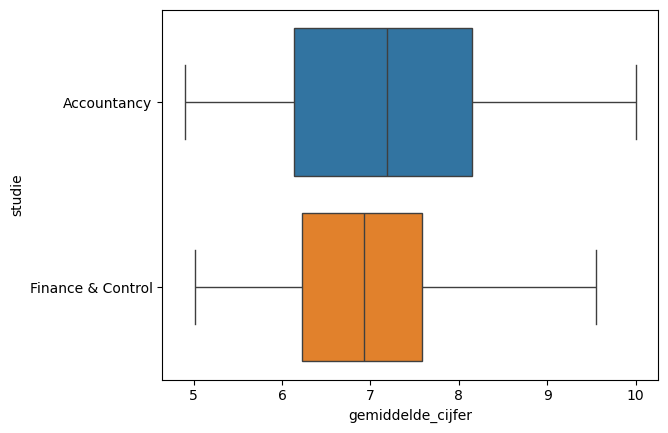

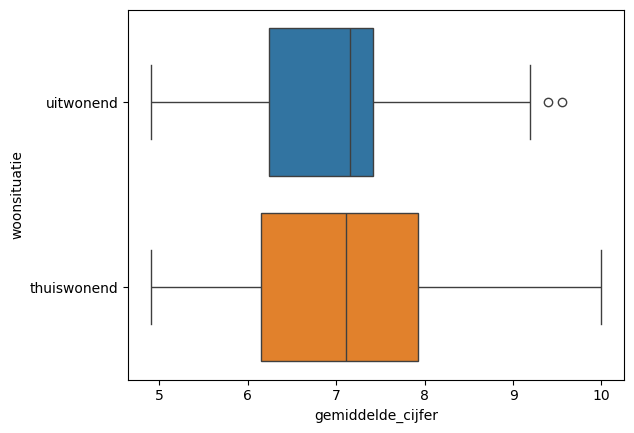

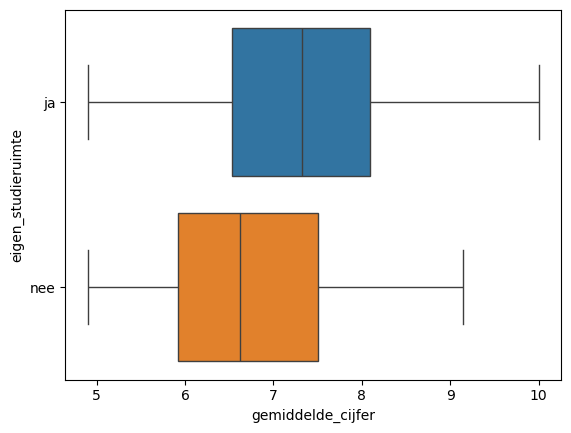

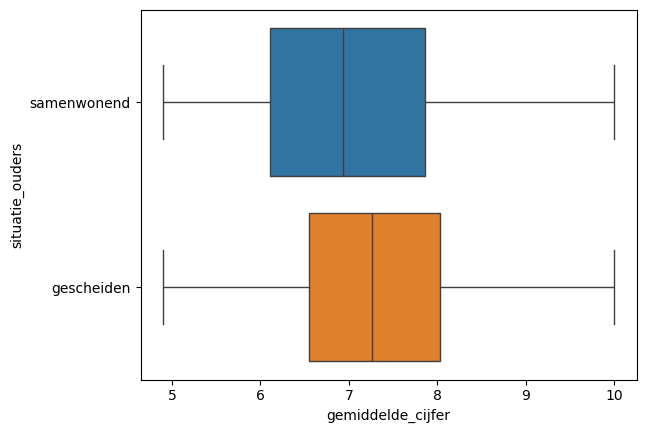

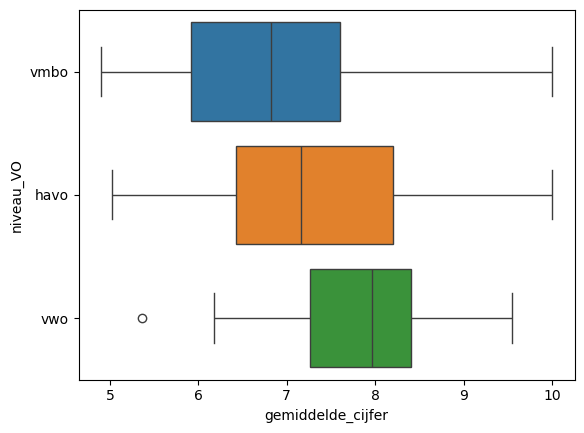

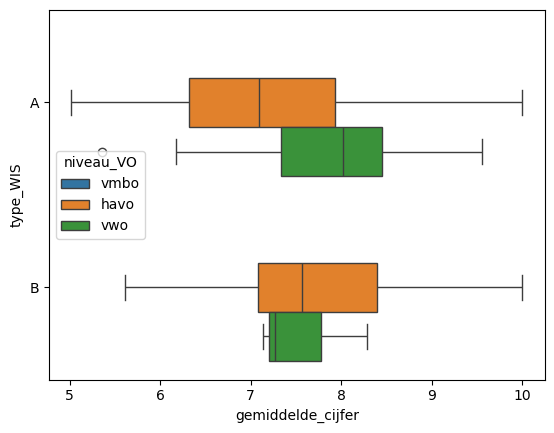

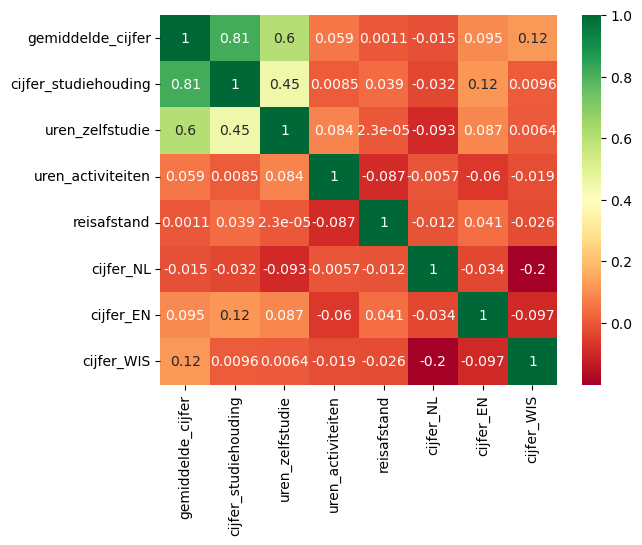

In [3]:
# We hebben boxplots geplot om de verdeling van variabelen per categorie te bekijken.
sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['studie'], hue=studenten['studie'], orient="h")
plt.show() 

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['woonsituatie'], hue=studenten['woonsituatie'], orient="h")
plt.show()

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['eigen_studieruimte'], hue=studenten['eigen_studieruimte'], orient="h")
plt.show()

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['situatie_ouders'], hue=studenten['situatie_ouders'], orient="h")
plt.show()  

sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['niveau_VO'], hue=studenten['niveau_VO'], orient="h")
plt.show()   
 
sns.boxplot(x=studenten['gemiddelde_cijfer'], y=studenten['type_WIS'], hue=studenten['niveau_VO'], orient="h")
plt.show() 


# Daarnaast hebben we ook een heatmap  geplot om de correlaties tussen de numerieke variabelen te bekijken.
numerieke_kol = studenten.select_dtypes(include=['float64', 'int64']).columns
numerieke_corre = studenten[numerieke_kol].corr()
heat = sns.heatmap(numerieke_corre, cmap="RdYlGn", annot=True)
plt.show()


Uit deze analyses komen naar voren dat de categorische variabelen: studiekeuze, eigen studieruimte, situatie_ouders en niveau_VO een sterk invloed hebben op de gemiddelde cijfer. Verder komt uit de analyses naar voren dat de nummerieke variabelen: uren_zelfstudie en cijfer_studiehouding impact hebben op de gemiddelde cijfer. 

<Axes: xlabel='uren_zelfstudie', ylabel='gemiddelde_cijfer'>

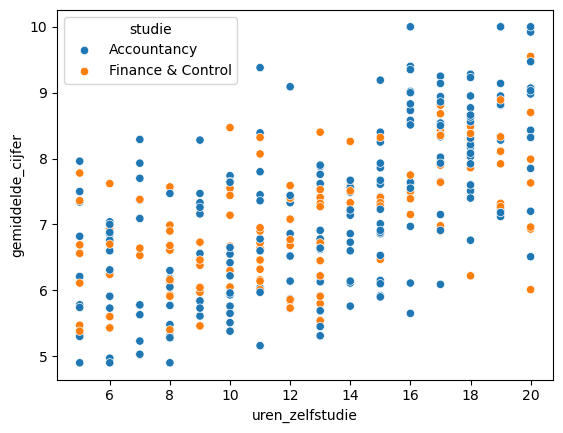

In [4]:
sns.scatterplot(y=studenten.gemiddelde_cijfer, x=studenten.uren_zelfstudie, hue=studenten['studie'])  
#Om het verband van de nummerieke variabelen met de gemiddelde cijfer verder te analyseren maken we scatterplots. 

<Axes: xlabel='cijfer_studiehouding', ylabel='gemiddelde_cijfer'>

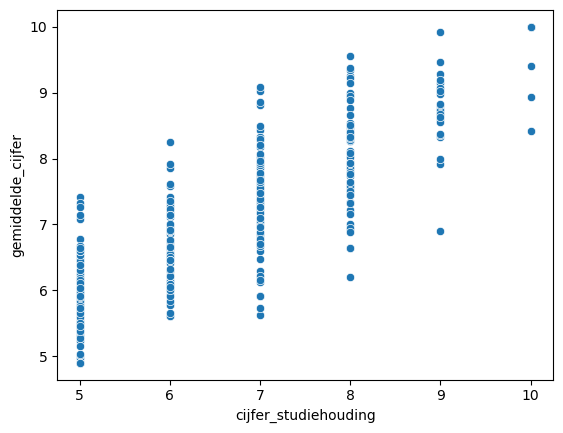

In [5]:
sns.scatterplot(y=studenten.gemiddelde_cijfer, x=studenten.cijfer_studiehouding) 
#Om het verband van de nummerieke variabelen met de gemiddelde cijfer verder te analyseren maken we scatterplots. 

Uit de plots, die zijn gemaakt, blijkt er een lineair verband te zijn tussen het gemiddelde cijfer en de niveau voorgezet niveau en het gemiddelde cijfer en cijfer studiehouding. Dit gaan we verder testen met een lineair regressiemodel. 

In [6]:
#Dummy variabelen aanmaken van de categorische variabelen
studenten['niveau_VO'] = studenten.niveau_VO.map({'vmbo':0,'havo': 1,'vwo':2}) 
studenten['woonsituatie'] = studenten.woonsituatie.map({'uitwonend':0,'thuiswonend': 1}) 
studenten['situatie_ouders'] = studenten.situatie_ouders.map({'samenwonend':0,'gescheiden': 1}) 
studenten['eigen_studieruimte'] = studenten.eigen_studieruimte.map({'ja':0,'nee': 1})  
studenten['type_WIS'] = studenten['type_WIS'].fillna("geen") 
studenten['type_WIS'] = studenten.type_WIS.map({'geen':0,'A': 1,'B':2})

studenten['niveau_VO']
studenten['woonsituatie']
studenten['situatie_ouders']
studenten['eigen_studieruimte']
studenten['type_WIS']

0      0
1      0
2      1
3      0
4      0
      ..
312    1
313    1
314    0
315    0
316    1
Name: type_WIS, Length: 317, dtype: int64

In [7]:
# We gaan schattingen doen

# We stellen een model op met OLS. 
model = smf.ols('gemiddelde_cijfer ~ cijfer_studiehouding + niveau_VO + eigen_studieruimte', data=studenten)

# Hierbij schatten we het model
regres = model.fit()

# We printen de samenvatting van de regressieresultaten. 
print(regres.summary())

                            OLS Regression Results                            
Dep. Variable:      gemiddelde_cijfer   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     419.0
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          3.16e-109
Time:                        10:52:57   Log-Likelihood:                -238.23
No. Observations:                 317   AIC:                             484.5
Df Residuals:                     313   BIC:                             499.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.1685 

We hebben een aantal linieare regressie modellen opgesteld, bijv. met de variabelen: uren_zelfstudie, studiekeuze, situatie_ouders. De modellen bleken niet te voldoen aan de voorwaarden van de residuen om statistisch valide te zijn. Zo voldeed een model niet aan de voorwaarde multicollineariteit, omdat de variabelen: uren_zelfstudie en eigen_studieruimte een te hoge VIF-waarde hadden. We hebben meerdere modellen opgesteld (zie bijlagen) en gevalueerd om het meest statistisch valide model te vinden om het gemiddelde cijfer aan het einde van jaar 1 te verklaren. Hieronder is onze  meest mogelijke statisch valide model te zien.

Hieronder gaan we door middel van verschillende testen toetsen of ons model statisch valide is. 

Hierbij wordt er gekeken naar de volgende voorwaarden: 
- normaliteit 
- centraliteit 
- homoscedasticiteit 
- multicollineariteit 

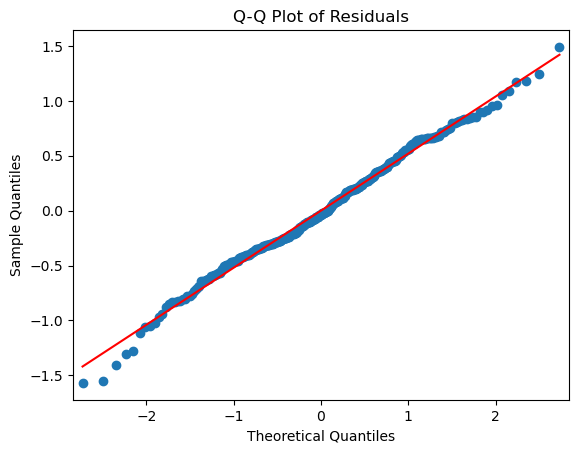

Shapiro-Wilk statistic 0.9942, p-value: 0.2645
t-test statistic for central tendency 0.0000 p-value: 1.0000


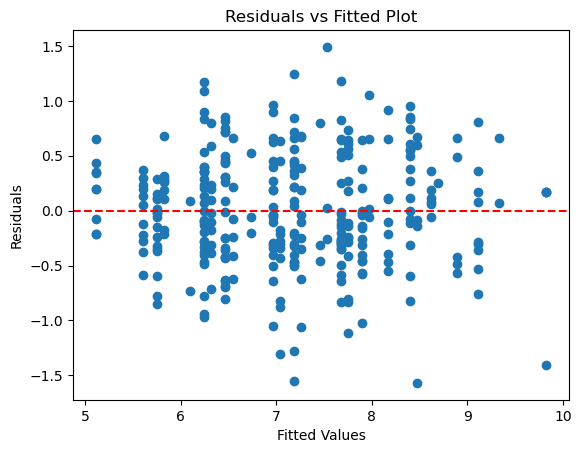

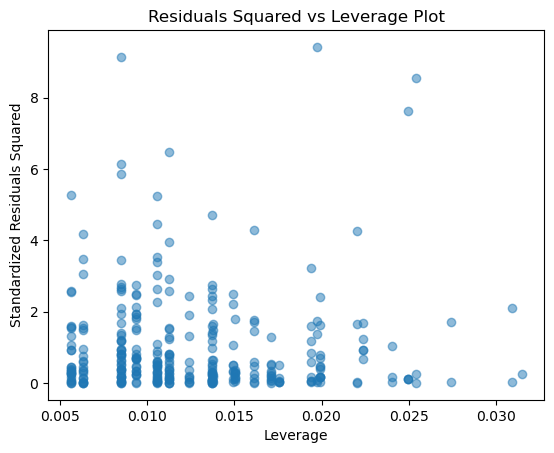

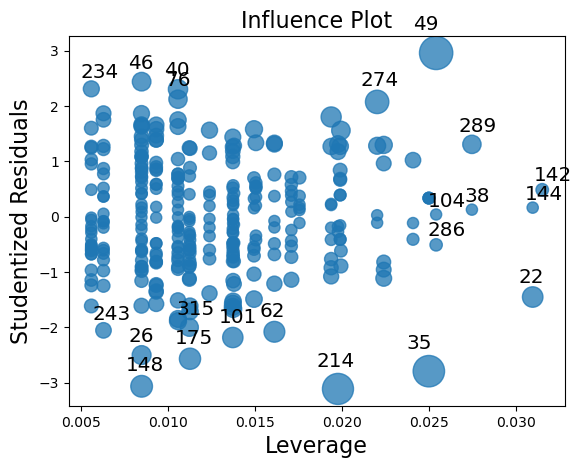

Breusch-Pagan statistic: 4.7439, p-value=0.1915
VIF values:
cijfer_studiehouding : 2.505339615279859
niveau_VO : 2.072090479299641
eigen_studieruimte : 1.438600996306584


In [45]:
# Q-Q plotten om de normaliteit te toetsen
sm.qqplot(regres.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test om de normaliteit te toetsen
shapiro_test = stats.shapiro(regres.resid)
print("Shapiro-Wilk statistic {:.4f}, p-value: {:.4f}".format(shapiro_test.statistic, shapiro_test.pvalue))
    
# Toets om de centraliteit te toetsen 
t_test = stats.ttest_1samp(regres.resid, 0)
print("t-test statistic for central tendency {:.4f} p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))

# Residuals vs Fitted plotten om de centraliteit te toetsen 
plt.scatter(regres.fittedvalues, regres.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Leverage vs Residuals squared plotten om de homoscedasticiteit te toetsen 
influence = regres.get_influence()
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_internal

plt.scatter(leverage, resid_stud**2, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Residuals Squared vs Leverage Plot')
plt.show()

sm.graphics.influence_plot(regres, size=24, criterion="cooks") 
plt.show()

# Breusch Pagan toets om de homoscedasticiteit te toetsen
brpg = sms.het_breuschpagan(regres.resid, model.exog)
print('Breusch-Pagan statistic: {:.4f}, p-value={:.4f}'.format(brpg[0],brpg[1]))

# Check om multicollineariteit te toetsen
X = studenten[['cijfer_studiehouding', 'niveau_VO', 'eigen_studieruimte']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
for i, col in enumerate(X.columns): 
    print(col, ":", vif[i])

**Conclusie:** Het lineair regressiemodel, die we hebben opgesteld, toont de grootste gelijkenis met een statistisch valide model waarmee het gemiddelde cijfer aan het eind van jaar 1 verklaard kan worden. omdat:
- Het model een adjusted R-kwadraatwaarde van 0.801 aantoont, dit houd in dat ongeveer 80.1% van de variantie in het gemiddelde eindcijfer wordt verklaard door de voorspellende variabelen. 
- De F-statistiek een waarde van (p < 0.05) aantoont, wat inhoud dat het model als geheel statistisch significant is. 
- Alle voorspellende variabelen (cijfer_studiehouding, niveau_VO en eigen_studieruimte) een waarde van (p < 0.05) geven, wat aangeeft dat ze elk een statistisch significant effect hebben op het gemiddelde eindcijfer. 
- De Shapiro-Wilk-test voor normaliteit een niet-significante p-waarde van 0.2645 aangeeft, wat suggereert dat de residuen normaal verdeeld zijn. 
- De t-test voor de centrale neiging een niet-significante p-waarde van 1.0000 aantoont, wat inhoudt dat er geen significant verschil is tussen de gemiddelde residuen en nul. 
- De Breusch-Pagan-test resulteert in een niet-significante p-waarde van 0.1915, wat aangeeft dat er geen significant heteroscedasticiteit is in de residuen. 
- De VIF waarden zijn allemaal redelijk laag met waarden onder 5, wat aangeeft dat multicollineariteit geen significant probleem is in het model. 

Verder kan de aanwezigheid van discrete numerieke variabelen (cijfer_studiehouding) in het regressiemodel mogelijk van invloed zijn op de normaliteit van de residuen.

**2B**

We vinden ons model goed genoeg om het gemiddelde eindcijfer in jaar 1 mee te kunnen verklaren, omdat de adjusted R-kwadraatwaarde van ons liniaere regresseimodel 0.799 is. Dit betekent dat ongeveer 79.9% van de variantie in het gemiddelde eindcijfer wordt verklaard door de voorspellende variabelen
,die in het anwoord van 2a te vinden zijn. Een optimale waarde hoort te liggen tussen de 70% en 90%. 

**2C** 

Om de eigenschappen, die bijdragen aan het succes, te bepalen en de verschillen tussen de opleidingen te bekijken. Gaan we dataset opdelen in de studie Accountancy en de studie Finance & Control. Vervolgens zullen we ons eerder opgestelde model gebruiken om de eigenschappen te bepalen en de verschillen te zien tussen de twee opleidingen. 

In [46]:
#dataset apart maken voor de opleiding Finance& Control
stud_Fin = studenten[(studenten['studie'] == 'Finance & Control')] 
stud_Fin

,studie,gemiddelde_cijfer,cijfer_studiehouding,uren_zelfstudie,uren_activiteiten,reisafstand,woonsituatie,eigen_studieruimte,situatie_ouders,niveau_VO,cijfer_NL,cijfer_EN,cijfer_WIS,type_WIS
1,Finance & Control,8.70,9,20,11,21.6,1,0,0,0,6,6,6,0
8,Finance & Control,7.08,5,12,11,8.2,1,0,1,1,6,5,9,2
19,Finance & Control,6.30,7,10,8,17.3,1,1,0,0,5,6,8,0
20,Finance & Control,7.59,6,14,15,12.1,1,0,0,1,8,6,6,1
21,Finance & Control,5.54,5,13,17,9.2,1,1,0,0,7,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Finance & Control,7.36,6,5,12,2.4,0,0,0,1,8,6,9,1
309,Finance & Control,6.95,8,11,17,13.1,1,1,0,1,7,9,5,1
310,Finance & Control,6.70,7,6,9,9.9,1,1,0,1,8,7,5,1
314,Finance & Control,5.73,5,12,12,12.7,1,0,0,0,6,6,5,0


In [47]:
# We gaan schattingen doen 

# We stellen een model op met OLS. 
model_Fin = smf.ols('gemiddelde_cijfer ~ cijfer_studiehouding + niveau_VO + eigen_studieruimte', data=stud_Fin)
 
# Hierbij schatten we het model
regres_Fin = model_Fin.fit()
 
# We printen de samenvatting van de regressieresultaten. 
print(regres_Fin.summary())


                            OLS Regression Results                            
Dep. Variable:      gemiddelde_cijfer   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.66e-36
Time:                        21:24:32   Log-Likelihood:                -69.484
No. Observations:                 115   AIC:                             147.0
Df Residuals:                     111   BIC:                             157.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.8180 

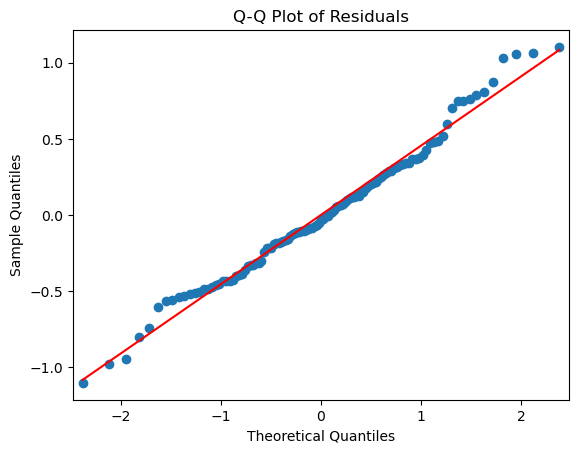

Shapiro-Wilk statistic 0.9853, p-value: 0.2455
t-test statistic for central tendency -0.0000 p-value: 1.0000


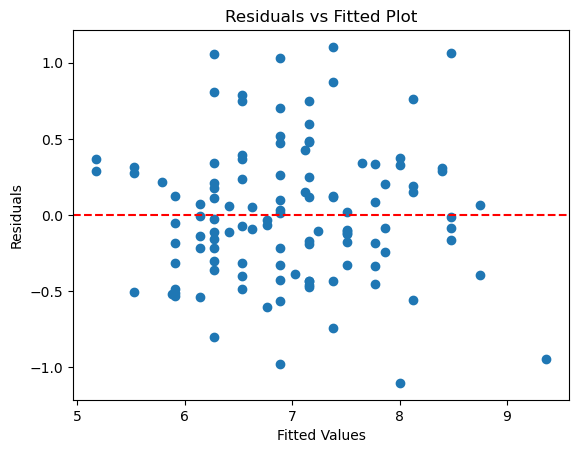

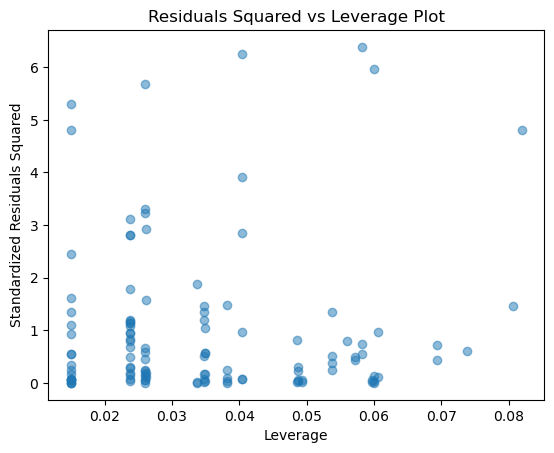

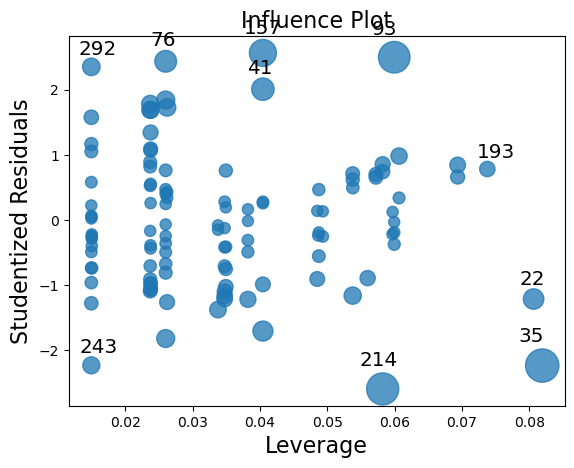

Breusch-Pagan statistic: 2.1587, p-value=0.5401
VIF values:
cijfer_studiehouding : 2.510987045133953
niveau_VO : 2.278837142687284
eigen_studieruimte : 1.393607419457701


In [48]:
# Q-Q plotten om de normaliteit te toetsen
sm.qqplot(regres_Fin.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test om de normaliteit te toetsen
shapiro_test = stats.shapiro(regres_Fin.resid)
print("Shapiro-Wilk statistic {:.4f}, p-value: {:.4f}".format(shapiro_test.statistic, shapiro_test.pvalue))
 
# Toets om de centraliteit te toetsen 
t_test = stats.ttest_1samp(regres_Fin.resid, 0)
print("t-test statistic for central tendency {:.4f} p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))

# Residuals vs Fitted plotten om de centraliteit te toetsen 
plt.scatter(regres_Fin.fittedvalues, regres_Fin.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Leverage vs Residuals squared plotten om de homoscedasticiteit te toetsen 
influence = regres_Fin.get_influence()
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_internal

plt.scatter(leverage, resid_stud**2, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Residuals Squared vs Leverage Plot')
plt.show()

sm.graphics.influence_plot(regres_Fin, size=24, criterion="cooks") 
plt.show()

# Breusch Pagan toets om de homoscedasticiteit te toetsen
brpg = sms.het_breuschpagan(regres_Fin.resid, model_Fin.exog)
print('Breusch-Pagan statistic: {:.4f}, p-value={:.4f}'.format(brpg[0],brpg[1]))

# Check om multicollineariteit te toetsen
X = stud_Fin[['cijfer_studiehouding', 'niveau_VO', 'eigen_studieruimte']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
for i, col in enumerate(X.columns): 
    print(col, ":", vif[i])

In [49]:
#dataset apart maken voor de opleiding Finance& Control
stud_Acc = studenten[(studenten['studie'] == 'Accountancy')] 
stud_Acc 

,studie,gemiddelde_cijfer,cijfer_studiehouding,uren_zelfstudie,uren_activiteiten,reisafstand,woonsituatie,eigen_studieruimte,situatie_ouders,niveau_VO,cijfer_NL,cijfer_EN,cijfer_WIS,type_WIS
0,Accountancy,6.86,7,12,11,8.4,0,0,0,0,5,8,8,0
2,Accountancy,10.00,10,19,16,16.1,1,0,1,1,8,6,5,1
3,Accountancy,7.88,8,13,9,15.0,1,0,0,0,5,7,8,0
4,Accountancy,6.13,7,13,14,12.8,1,1,0,0,7,6,8,0
5,Accountancy,8.28,8,19,14,12.1,1,0,0,0,5,6,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Accountancy,5.65,5,10,15,16.7,1,1,0,1,5,7,6,1
311,Accountancy,6.91,6,15,11,20.8,1,0,0,0,6,6,5,0
312,Accountancy,6.64,5,13,13,10.9,1,0,0,1,5,7,6,1
313,Accountancy,8.51,8,16,8,13.1,1,0,0,1,7,7,5,1


In [50]:
# We gaan schattingen doen  

# We stellen een model op met OLS.
model_Acc = smf.ols('gemiddelde_cijfer ~ cijfer_studiehouding + niveau_VO + eigen_studieruimte', data=stud_Acc)

# Hierbij schatten we het model
regres_Acc = model_Acc.fit()

# We printen de samenvatting van de regressieresultaten. 
print(regres_Acc.summary())

                            OLS Regression Results                            
Dep. Variable:      gemiddelde_cijfer   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     323.0
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           5.52e-76
Time:                        21:24:33   Log-Likelihood:                -151.52
No. Observations:                 202   AIC:                             311.0
Df Residuals:                     198   BIC:                             324.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.8308 

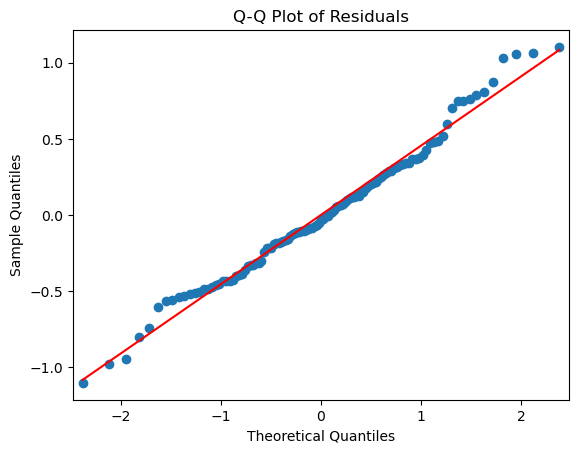

Shapiro-Wilk statistic 0.9853, p-value: 0.2455
t-test statistic for central tendency 0.0000 p-value: 1.0000


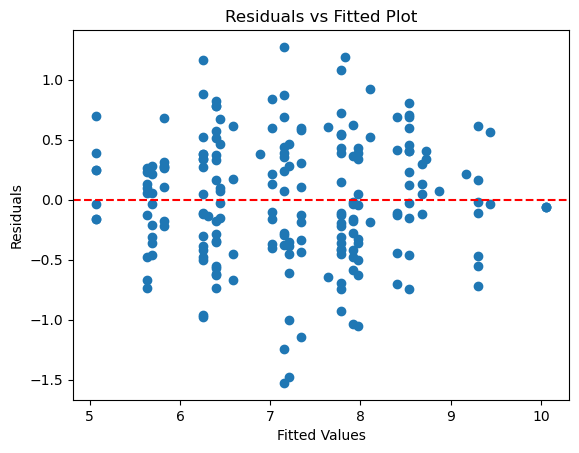

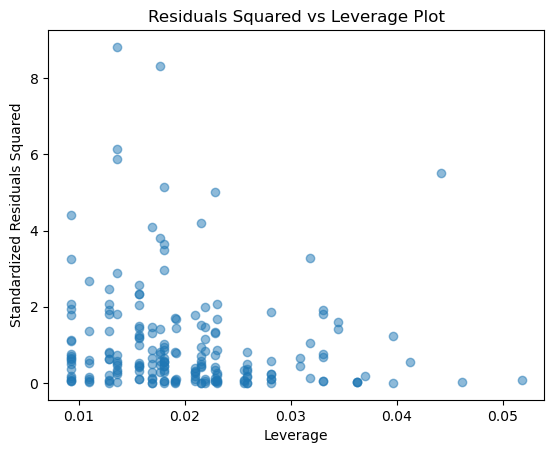

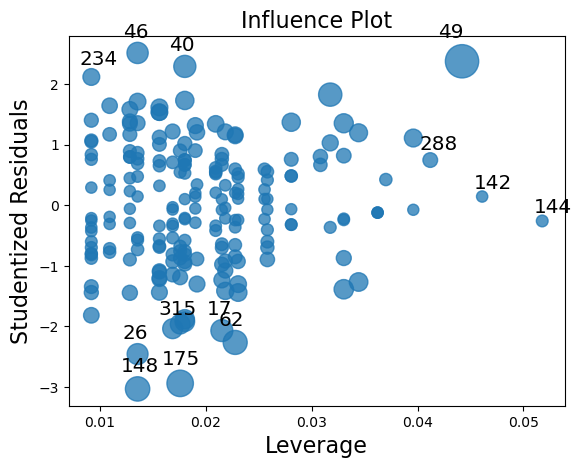

Breusch-Pagan statistic: 0.4802, p-value=0.9232
VIF values:
cijfer_studiehouding : 2.510987045133953
niveau_VO : 2.278837142687284
eigen_studieruimte : 1.393607419457701


In [51]:
# Q-Q plotten om de normaliteit te toetsen
sm.qqplot(regres_Fin.resid, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test om de normaliteit te toetsen
shapiro_test = stats.shapiro(regres_Fin.resid)
print("Shapiro-Wilk statistic {:.4f}, p-value: {:.4f}".format(shapiro_test.statistic, shapiro_test.pvalue))
    
# Toets om de centraliteit te toetsen 
t_test = stats.ttest_1samp(regres_Acc.resid, 0)
print("t-test statistic for central tendency {:.4f} p-value: {:.4f}".format(t_test.statistic, t_test.pvalue))

# Residuals vs Fitted plotten om de centraliteit te toetsen 
plt.scatter(regres_Acc.fittedvalues, regres_Acc.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Leverage vs Residuals squared plotten om de homoscedasticiteit te toetsen 
influence = regres_Acc.get_influence()
leverage = influence.hat_matrix_diag
resid_stud = influence.resid_studentized_internal

plt.scatter(leverage, resid_stud**2, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals Squared')
plt.title('Residuals Squared vs Leverage Plot')
plt.show()

sm.graphics.influence_plot(regres_Acc, size=24, criterion="cooks") 
plt.show()

# Breusch Pagan toets om de homoscedasticiteit te toetsen
brpg = sms.het_breuschpagan(regres_Acc.resid, model_Acc.exog)
print('Breusch-Pagan statistic: {:.4f}, p-value={:.4f}'.format(brpg[0],brpg[1]))

# Check om multicollineariteit te toetsen
X = stud_Fin[['cijfer_studiehouding', 'niveau_VO', 'eigen_studieruimte']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF values:")
for i, col in enumerate(X.columns): 
    print(col, ":", vif[i])

In [52]:
print(regres_Fin.summary()) 
print(regres_Acc.summary())

                            OLS Regression Results                            
Dep. Variable:      gemiddelde_cijfer   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.66e-36
Time:                        21:24:34   Log-Likelihood:                -69.484
No. Observations:                 115   AIC:                             147.0
Df Residuals:                     111   BIC:                             157.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.8180 

**Conclusie:**  Bij het vergeljken van de eigenschappen is vanuit het model naar voren gekomen dat er een significant verschil is tussen de mate van invloed van studiehouding en niveau_VO op de studies. Hierbij is te zien dat de cijfers van studiehouding en het niveau van vooropleiding meer invloed hebben op de studie Accountancy. 